# Model Creation, Hyperparameter Search, and Model Evaluation

After creating the pre-processed dataset, the next steps involve model creation, hyperparameter search, and model evaluation. This encompasses the creation of a notebook dedicated to train-test splits, implementation of a RandomForestClassifier.

I initiated the process by splitting the dataset into training and testing sets. Subsequently, I implemented either a RandomForestClassifiertp establish an initial model. This step allowed for the assessment of the classifier's accuracy measures on the dataset. Following the initial model training, I delved into hyperparameter tuning to enhance the model's performance. I opted for either GridSearchCV or RandomizedSearchCV, depending on personal preference. These techniques systematically explore and optimize hyperparameters, contributing to the model's effectiveness.

Further investigation includes a count plot of transaction types, providing insight into the distribution of different transaction categories. Moving to bivariate analysis, a boxplot highlighted the potential correlation between transaction amounts and the binary fraudulent label, indicating that fraudulent transactions often involve higher amounts. Multivariate analysis involved a correlation heatmap, emphasizing the interplay between transaction amounts, origin and destination balances, and the fraud status. These findings serve as a foundation for formulating hypotheses, specifically focusing on the potential significance of transaction amounts and types in predicting fraudulent activities. The iterative process of model creation, hyperparameter tuning, and evaluation ensures that the model achieves optimal performance on the specific dataset, laying the groundwork for informed decision-making based on reliable predictions.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

file_path = '../data/PS_20174392719_1491204439457_log.csv'
# Loading the CSV file
df = pd.read_csv(file_path, nrows=10000)

Text(0, 0.5, 'Frequency')

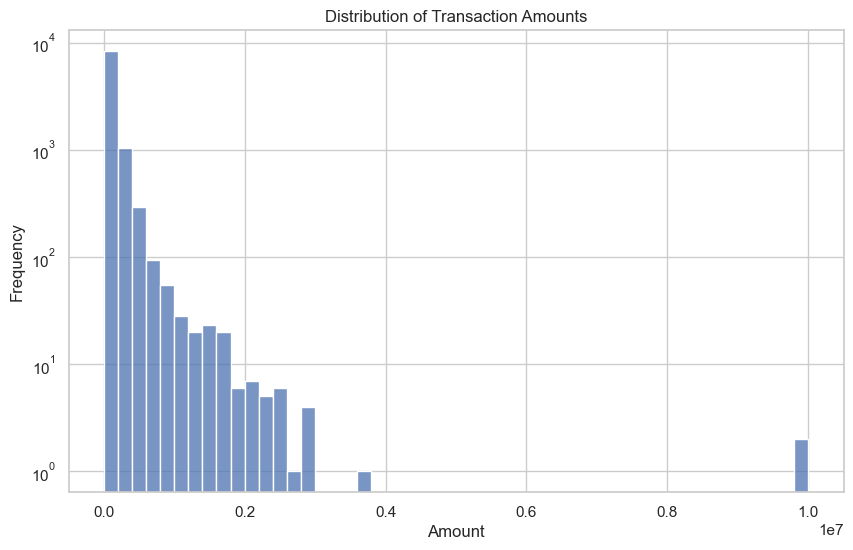

In [43]:
# Setting the style for "style"
sns.set(style="whitegrid")

# Creating the histogram for transaction amounts

plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.yscale('log')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

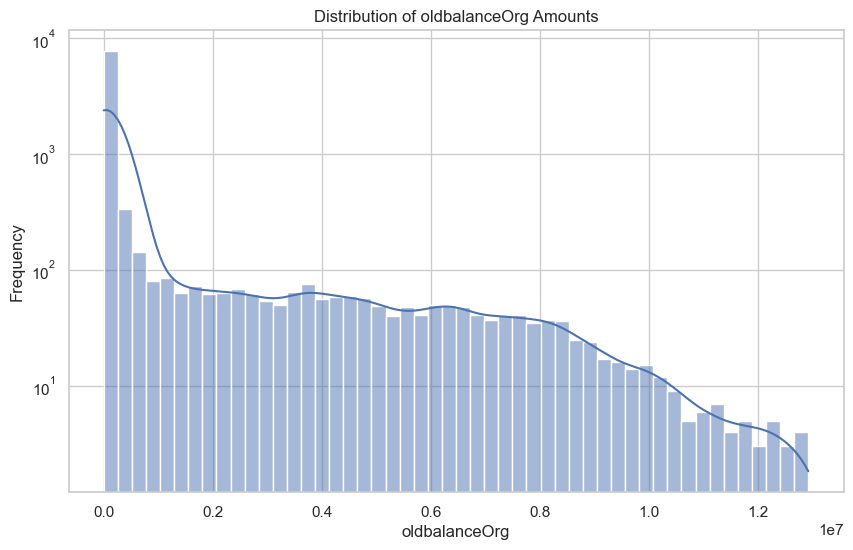

In [44]:
# Creating the histogram for oldbalanceOrg amounts

plt.figure(figsize=(10, 6))
sns.histplot(df['oldbalanceOrg'], bins=50, kde=True)
plt.title('Distribution of oldbalanceOrg Amounts')
plt.xlabel('oldbalanceOrg')
plt.yscale('log')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

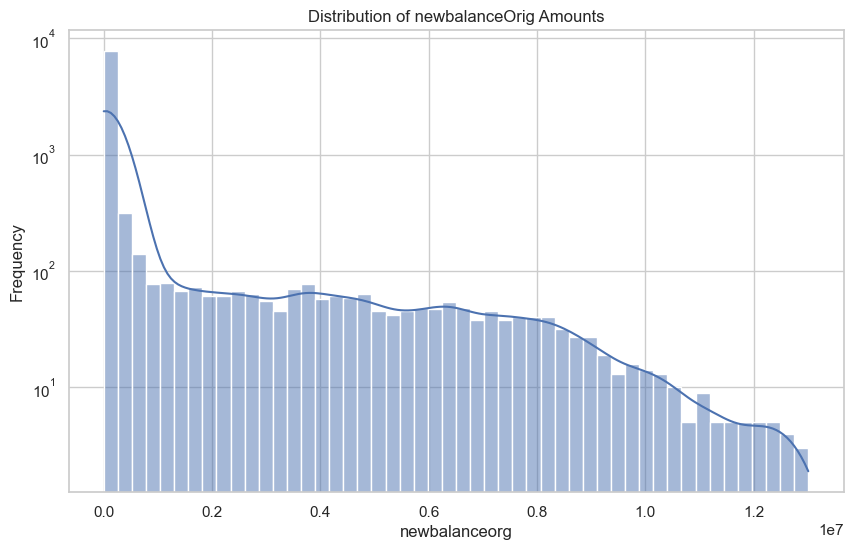

In [45]:
# Creating the histogram for newbalanceOrig amounts

plt.figure(figsize=(10, 6))
sns.histplot(df['newbalanceOrig'], bins=50, kde=True)
plt.title('Distribution of newbalanceOrig Amounts')
plt.xlabel('newbalanceorg')
plt.yscale('log')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

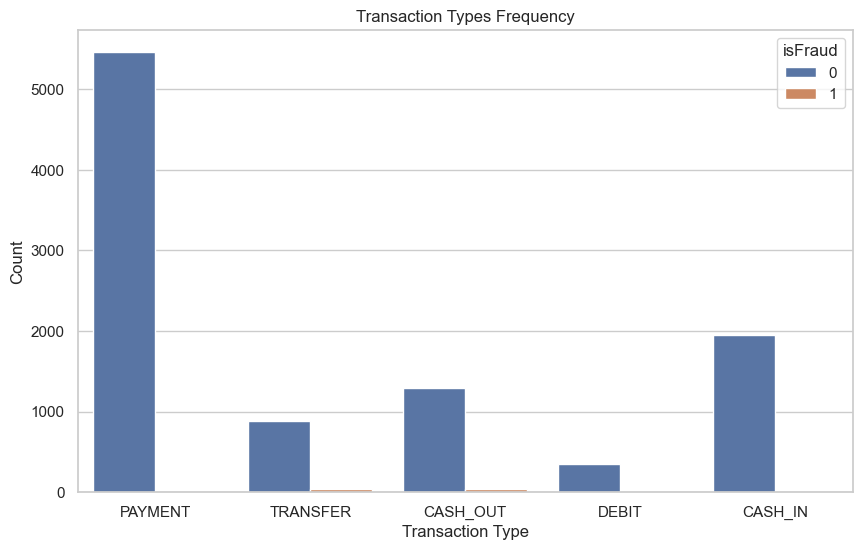

In [46]:
# Creating the count plot for transaction types with fraud differentiation

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, hue='isFraud')
plt.title('Transaction Types Frequency')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

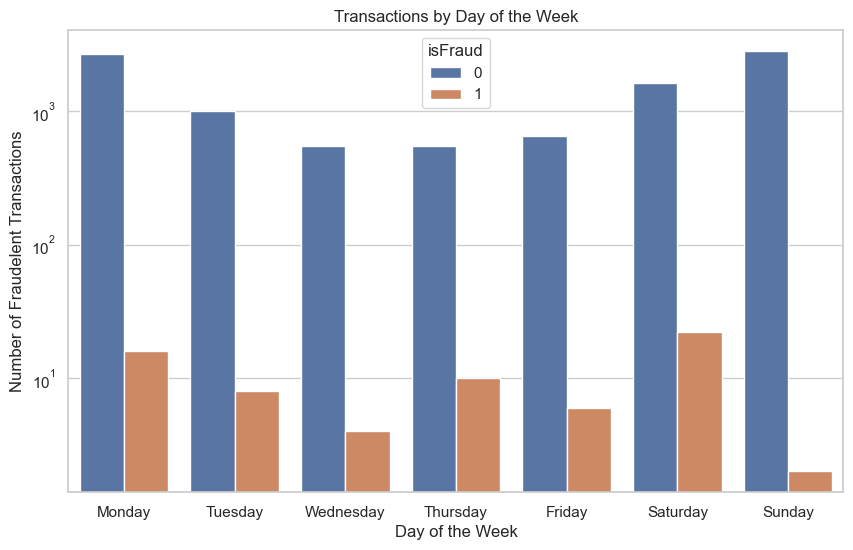

In [47]:
# Step represents day of the week
day_mapping = {1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thursday',5:'Friday', 6:'Saturday', 7:'Sunday'}
df['day_of_week'] = df['step'].map(day_mapping)

# Creating the count plot for transactions by day of the week with fraud differentiation

plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='isFraud')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudelent Transactions')
plt.yscale('log')

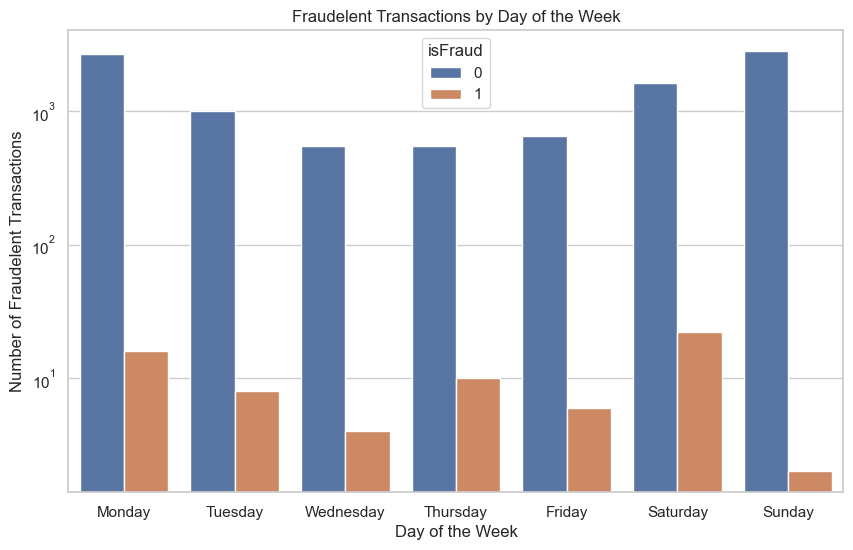

In [48]:
# Creating the count plot for fraudulent transactions by day of the week

plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', hue='isFraud', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fraudelent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudelent Transactions')
plt.yscale('log')

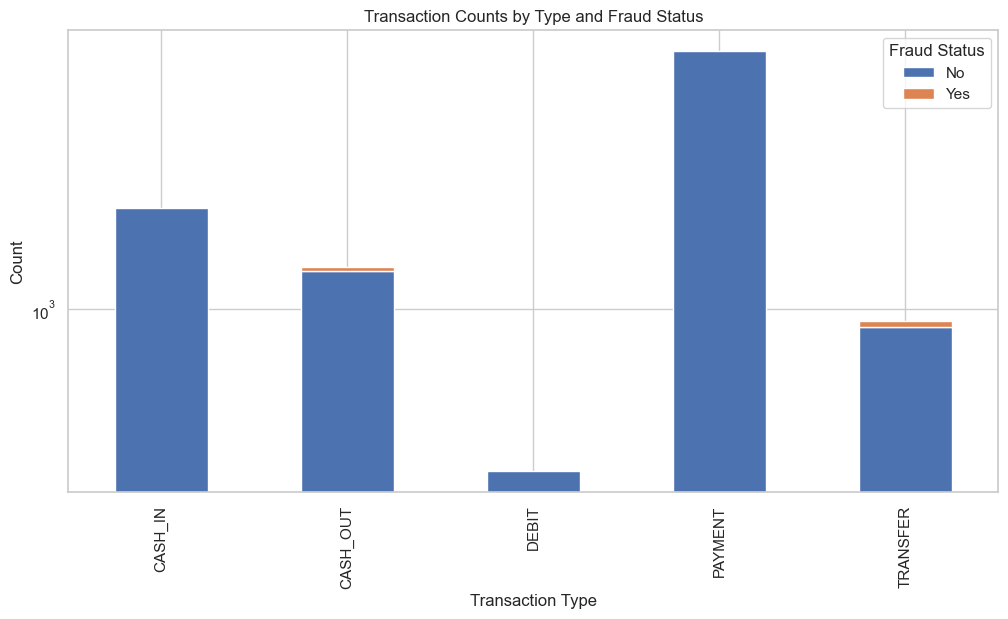

In [49]:
# Creating a cross-tabulation of type and isFraud
type_fraud_ct = pd.crosstab(df['type'], df['isFraud'])

# Create a stacked bar plot for transaction counts by type and fraud status
type_fraud_ct.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Transaction Counts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.yscale('log')
plt.legend(title='Fraud Status', labels=['No', 'Yes'])

Text(0, 0.5, 'Old Balance Org')

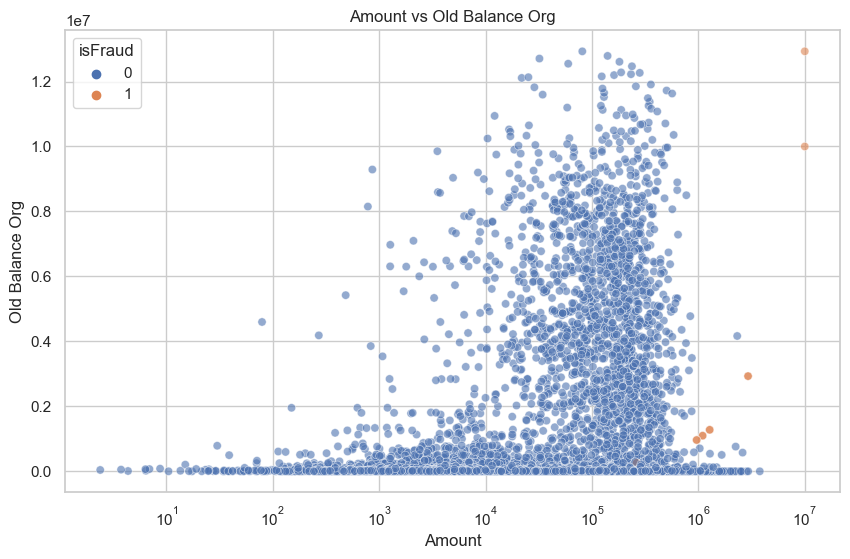

In [50]:
# Creating a scatter plot for amount vs oldbalanceOrg with fraud differentiation

plt.figure(figsize=(10,6))
sns.scatterplot(x='amount', y='oldbalanceOrg', hue='isFraud', data=df, alpha=0.6)
plt.title('Amount vs Old Balance Org')
plt.xlabel('Amount')
plt.xscale('log')
plt.ylabel('Old Balance Org')

Text(0, 0.5, 'New Balance Org')

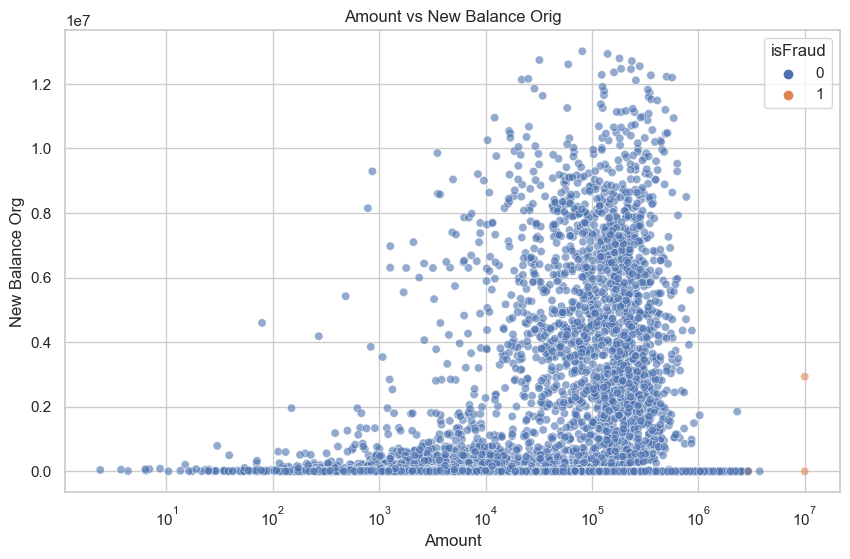

In [51]:
# Creating a scatter plot for amount vs newbalanceOrig with fraud differentiation

plt.figure(figsize=(10,6))
sns.scatterplot(x='amount', y='newbalanceOrig', hue='isFraud', data=df, alpha=0.6)
plt.title('Amount vs New Balance Orig')
plt.xlabel('Amount')
plt.xscale('log')
plt.ylabel('New Balance Org')

Text(0, 0.5, 'Old Balance Dest')

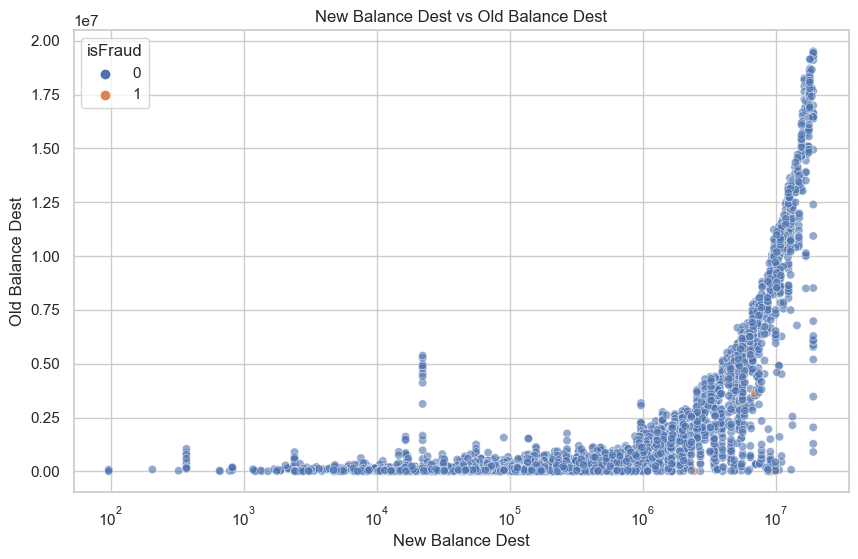

In [52]:
# Creating a scatter plot for newbalanceDest vs oldbalanceDest with fraud differentiation

plt.figure(figsize=(10,6))
sns.scatterplot(x='newbalanceDest', y='oldbalanceDest', hue='isFraud', data=df, alpha=0.6)
plt.title('New Balance Dest vs Old Balance Dest')
plt.xlabel('New Balance Dest')
plt.xscale('log')
plt.ylabel('Old Balance Dest')

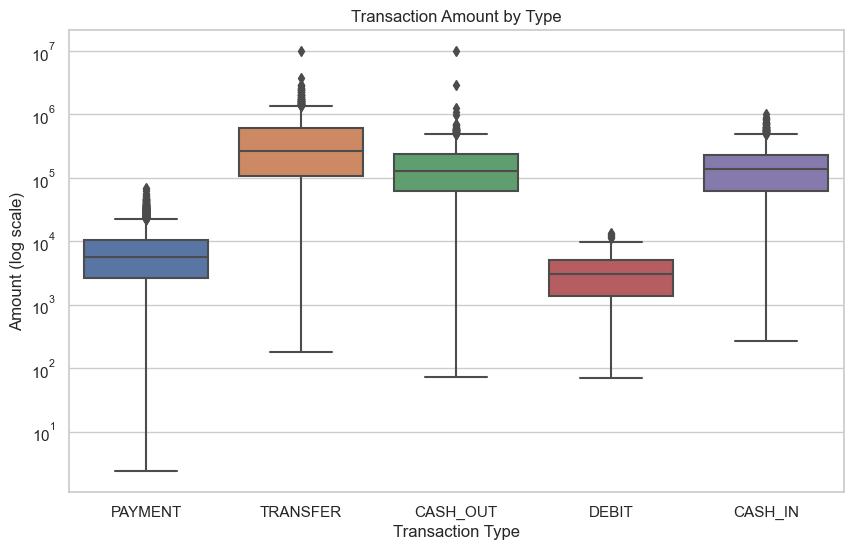

In [53]:
# Creating a boxplot for transaction amount by type

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (log scale)')
plt.yscale('log')

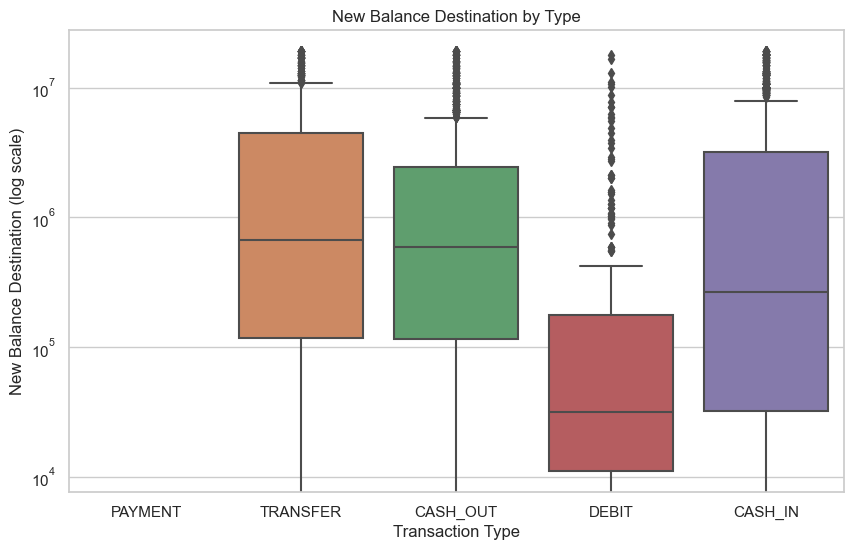

In [54]:
# Creating a boxplot for new balance destination by type

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='newbalanceDest', data=df)
plt.title('New Balance Destination by Type')
plt.xlabel('Transaction Type')
plt.ylabel('New Balance Destination (log scale)')
plt.yscale('log')

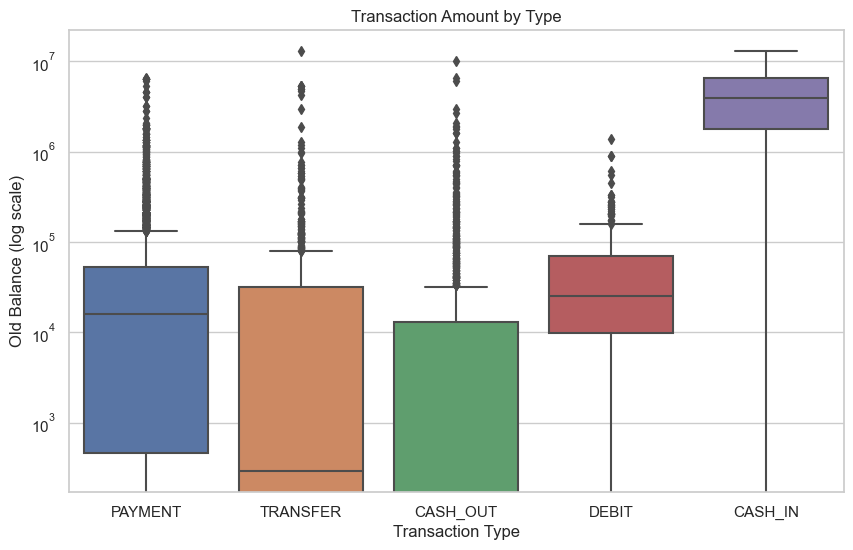

In [55]:
# Creating a boxplot for old balance by type

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='oldbalanceOrg', data=df)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Old Balance (log scale)')
plt.yscale('log')

Text(0, 0.5, 'Density')

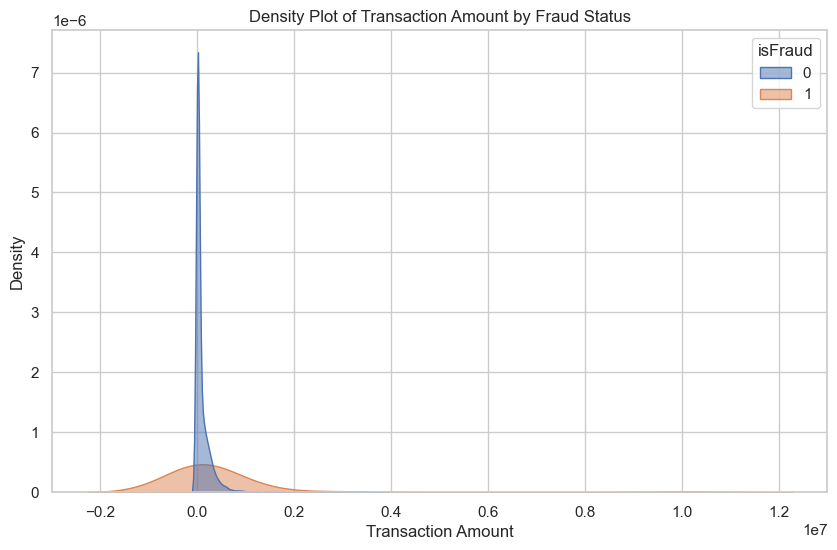

In [56]:
# Creating the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='amount', hue='isFraud', fill=True, common_norm=False, alpha=0.5)

# Setting the titles and labels
plt.title('Density Plot of Transaction Amount by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')

c:\Users\stacy\anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


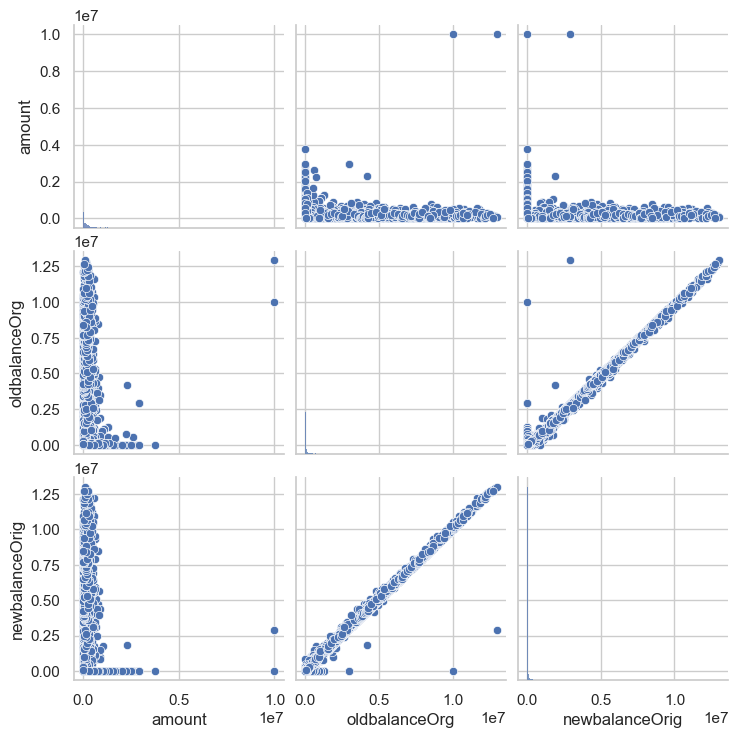

In [57]:
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
sns.pairplot(df[selected_features])

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

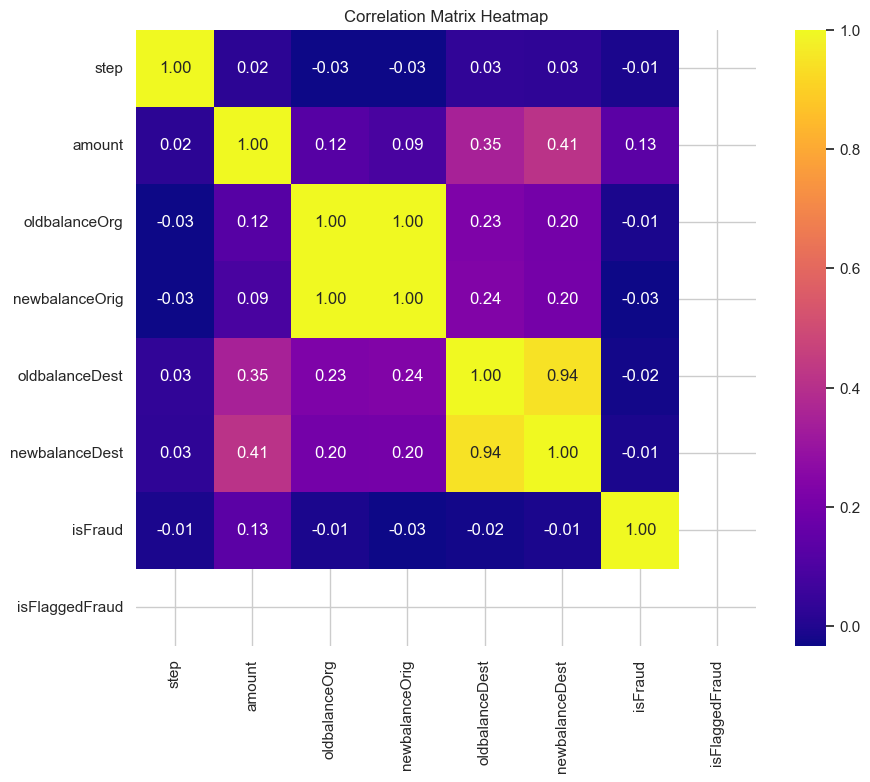

In [58]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Generate a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='plasma')
plt.title('Correlation Matrix Heatmap')

Text(0.5, 1.0, 'Transaction Amount and Count Over Time')

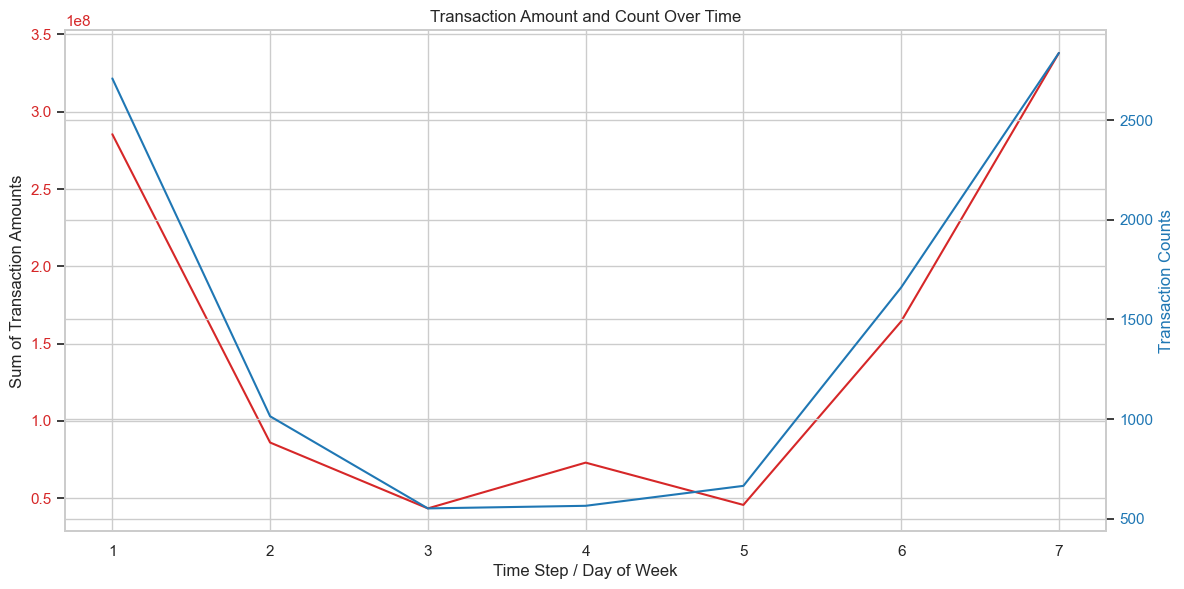

In [59]:
# Convert 'step' to numeric
df['step'] = pd.to_numeric(df['step'], errors='coerce')

# Create a helper column for counting
df['count'] = 1

# Aggregate data for plotting
time_series_data = df.groupby('step').agg({'amount': 'sum', 'count': 'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))
# Plot Sum of Transaction Amounts
ax1.plot(time_series_data['step'], time_series_data['amount'], color='tab:red')
ax1.set(xlabel='Time Step / Day of Week', ylabel='Sum of Transaction Amounts')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()

ax2.plot(time_series_data['step'], time_series_data['count'], color='tab:blue')
ax2.set_ylabel('Transaction Counts', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Transaction Amount and Count Over Time')